In [1]:
import torch
import torchvision
import time

In [2]:
random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

# Import CIFAR 10 data. 
## CIFAR 10 
- Consists of 60000 32x32 colour images in 10 classes 
- 50000 training images and 10000 test images 
- Class: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck

## Dataloader 
- Can use augmentation methods
- convert image to tensor(used in pytorch) is necessary 

In [3]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.CIFAR10('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=128, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.CIFAR10('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=128, shuffle=True)

Files already downloaded and verified
Files already downloaded and verified


# Import libraries which used in Training part 

In [4]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import lr_scheduler
import time

# Construct 5 Convolutional Neural Network
## 4 Convolution layers + 1 Fully connected Layer 
## Convolution layer >> Batch Normalization >> ReLU

In [5]:
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__() # Fill the blanks 
        self.conv1 = nn.Conv2d(in_channels = , out_channels = , kernel_size = , padding = , stride = )
        self.bn1 = nn.BatchNorm2d()
        self.conv2 = nn.Conv2d(in_channels = , out_channels = , kernel_size = , padding = , stride = )
        self.bn2 = nn.BatchNorm2d()
        self.conv3 = nn.Conv2d(in_channels = , out_channels = , kernel_size = , padding = , stride = )
        self.bn3 = nn.BatchNorm2d()
        self.conv4 = nn.Conv2d(in_channels = , out_channels = , kernel_size = , padding = , stride = )
        self.bn4 = nn.BatchNorm2d()
        self.fc = nn.Linear("""???""", """???""")

        
    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)), inplace = True)     
        x = F.max_pool2d(x, kernel"""???""")                                  
        x = F.relu(self.bn2(self.conv2(x)), inplace = True)     
        x = F.max_pool2d(x, """???""")                                  
        x = F.relu(self.bn3(self.conv3(x)), inplace = True)     
        x = F.max_pool2d(x, """???""")                                  
        x = F.relu(self.bn4(self.conv4(x)), inplace = True)     
        x = x.view(x.size(0), -1)                               
        x = self.fc(x)
        return x

## inplace=True means that it will modify the input directly, without allocating any additional output. 
## It can sometimes slightly decrease the memory usage, but may not always be a valid operation (because the original input is destroyed).

## net.cuda: training network with GPU
    '___.cuda()': model, images and labels to GPU  

    if when you are using multi-GPU, have to use '.to(device)' instead of '.cuda()'
        - device = 'cuda:#' if torch.cuda.is_available() else 'cpu'
## criterion(loss)
    cross entropy loss 
## optimizer: SGD with learning rate '?'
    - Total epoch = 50 
    - momentum = 0.9 
    - weight decay = 1e-4
## step lr scheduler: learning rate x ('?') when epoch is '?'

In [6]:
net = Network()
net = net.cuda()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr="""???""", momentum=0.9, weight_decay=1e-4)
step_lr_scheduler = lr_scheduler.MultiStepLR(optimizer, milestones=["""???"""], gamma ="""???""")

In [7]:
def train(epoch):
    net.train()
    running_loss = 0 
    for batch_idx, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs = inputs.cuda()
        labels = labels.cuda()
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        if batch_idx % 30 ==29:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * 128, len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))

            train_losses.append(loss.item())
            train_counter.append((batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
            torch.save(net.state_dict(), './cnn_model.pth')
            torch.save(optimizer.state_dict(), './cnn_optimizer.pth')


In [8]:
def test():
    net.eval()
    test_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for batch_idx, data in enumerate(test_loader):
            images, labels = data
            images = images.cuda()
            labels = labels.cuda()
            outputs = net(images)
            loss = criterion(outputs, labels)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            test_loss += loss.item()
    test_losses.append(test_loss/(batch_idx+1))
    print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss/(batch_idx+1), correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))
    accuracy.append(100. * correct /len(test_loader.dataset))

In [9]:
# lists which will be used in plot accuracy and error graph 
epochs = 50
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(epochs + 1)]
accuracy = []

# Train 50 epochs (= network will watch 50000 training images 50 times)

In [10]:
test()
since = time.time()
epochs = 50
for epoch in range(1, epochs + 1):
    train(epoch)
    if epoch == 50: 
        print('Final accuracy of 5 Layer CNN on CIFAR 10')
    test()
    step_lr_scheduler.step()
finish = time.time()
print('Training Finished in {}min'.format((finish - since)//60))


Test set: Avg. loss: 2.3011, Accuracy: 1152/10000 (12%)

Train Epoch: 1 [3712/50000 (7%)]	Loss: 1.509211
Train Epoch: 1 [7552/50000 (15%)]	Loss: 1.419813
Train Epoch: 1 [11392/50000 (23%)]	Loss: 1.398782
Train Epoch: 1 [15232/50000 (30%)]	Loss: 1.270278
Train Epoch: 1 [19072/50000 (38%)]	Loss: 1.199730
Train Epoch: 1 [22912/50000 (46%)]	Loss: 1.088663
Train Epoch: 1 [26752/50000 (53%)]	Loss: 1.105669
Train Epoch: 1 [30592/50000 (61%)]	Loss: 1.068921
Train Epoch: 1 [34432/50000 (69%)]	Loss: 0.989696
Train Epoch: 1 [38272/50000 (76%)]	Loss: 1.018997
Train Epoch: 1 [42112/50000 (84%)]	Loss: 1.016716
Train Epoch: 1 [45952/50000 (92%)]	Loss: 0.853280
Train Epoch: 1 [49792/50000 (99%)]	Loss: 1.051800

Test set: Avg. loss: 1.6401, Accuracy: 4770/10000 (48%)

Train Epoch: 2 [3712/50000 (7%)]	Loss: 0.731947
Train Epoch: 2 [7552/50000 (15%)]	Loss: 0.897964
Train Epoch: 2 [11392/50000 (23%)]	Loss: 0.850608
Train Epoch: 2 [15232/50000 (30%)]	Loss: 0.834978
Train Epoch: 2 [19072/50000 (38%)]	Loss:

# Plot training loss graph

[]

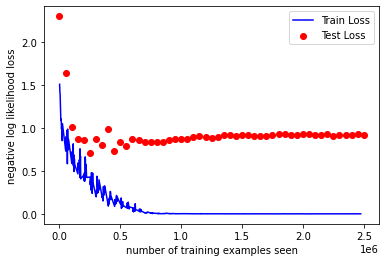

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
plt.plot()

# Plot training accuracy graph 

[]

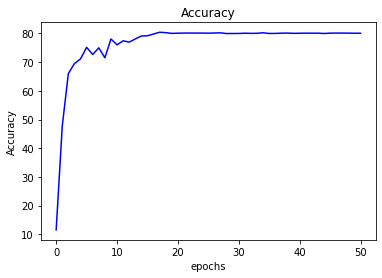

In [12]:
plt.figure()
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.plot(range(len(accuracy)), accuracy, color = 'blue')
plt.plot()